In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.cluster as clu

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
np.random.seed(666)



In [4]:
iris_x = load_iris()['data']
iris_y = load_iris()['target']

In [5]:
print(iris_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
def kmeans(data, k):
    kmeans = clu.KMeans(n_clusters=k).fit(data)
    #TODO: moet dit nog itereren of doet hij dat zelf? --> zou hij zelf moeten doen toch? 

    clusterid=kmeans.labels_
    clusteroids=kmeans.cluster_centers_



In [7]:
kmeans(iris_x,4)

In [8]:
print(clusterid)
print(clusteroids)
# is dit wat we hier nodig hebben?

NameError: name 'clusterid' is not defined

In [9]:
def dataclustering(data, x, n):
    #x= number of particles
    #n= number of centroids
    np.random.seed(666)
    initialisation = np.random.randint(0,100, size=(x, n))
    #is het erg dat deze random values tussen 0 en 1 liggen, hoe kan ik ze in de hele mogelijke range leggen (bv tss 1 en 4)?
    
    counter = 0
    particles = initialisation
    clusterlist = []
    particlelist = []
    
    for particle in particles:
        
        for z in data:
            distance = abs(particle-z) #absolute hier pakken is goed toch? anders wordt kleinste distance niet gepakt
            print(distance)
            closest = np.argpartition(distance,0)[0]
            print(closest)
            clusterlist.append(closest) 
        particlelist.append(clusterlist) #different list of 150 closest clusters for each particle
        clusterlist = []
        print(particlelist) 
        
        
# def computefitness(): 
        
        
############################# moet het mss niet andersom?  
#per punt kijken welke cluster het dichtste bij is ipv per cluster kijken welk punt?       
        
#     initialisation = np.random.randint(0,100, size=(x, n))
#     #is het erg dat deze random values tussen 0 en 1 liggen, hoe kan ik ze in de hele mogelijke range leggen (bv tss 1 en 4)?
    
#     counter = 0
#     particles = initialisation
#     clusterlist = []
    
#     for z in data:
#         best_distance = 1000 #hoe dit aanpakken? 
#         best particle
#         for particle in particles:
#             distance = abs(particle-z) #absolute hier pakken is goed toch? anders wordt kleinste distance niet gepakt
            
#             if distance < best_distance:
#                 best_distance = distance
            
#             print(distance)
#             closest = np.argpartition(distance,0)[0]
#             print(closest)
#             clusterlist.append(closest)
#         print(clusterlist) 
            
            
            
            
        
        
        
#         distance = data[counter]-x
#         print(counter)
#         counter += 1
#         print(distance)
        
#         z= np.argpartition()
        
        #return distance
    
#     counter = 0
    
#     for x in initialisation:
#         counter += 1
#         print(counter)
        
#         for z in data:
#             #best_dist = 0
#             #compute the pairwise distance e.g. between z1 and x1
#             distance = z-x 
            
            
            
#             sum(distance)
#             if sum(distance) < best_dist:
                
#             print(distance)
#             sum(x)
        

        
    
    
        
    
# def calculateBestDist(,datapoint):
    
    

In [10]:
a = dataclustering(iris_x,10,4)
print(a)

[ 3.1 41.5 28.6 61.8]
0
[ 2.9 42.  28.6 61.8]
0
[ 2.7 41.8 28.7 61.8]
0
[ 2.6 41.9 28.5 61.8]
0
[ 3.  41.4 28.6 61.8]
0
[ 3.4 41.1 28.3 61.6]
0
[ 2.6 41.6 28.6 61.7]
0
[ 3.  41.6 28.5 61.8]
0
[ 2.4 42.1 28.6 61.8]
0
[ 2.9 41.9 28.5 61.9]
0
[ 3.4 41.3 28.5 61.8]
0
[ 2.8 41.6 28.4 61.8]
0
[ 2.8 42.  28.6 61.9]
0
[ 2.3 42.  28.9 61.9]
0
[ 3.8 41.  28.8 61.8]
0
[ 3.7 40.6 28.5 61.6]
0
[ 3.4 41.1 28.7 61.6]
0
[ 3.1 41.5 28.6 61.7]
0
[ 3.7 41.2 28.3 61.7]
0
[ 3.1 41.2 28.5 61.7]
0
[ 3.4 41.6 28.3 61.8]
0
[ 3.1 41.3 28.5 61.6]
0
[ 2.6 41.4 29.  61.8]
0
[ 3.1 41.7 28.3 61.5]
0
[ 2.8 41.6 28.1 61.8]
0
[ 3.  42.  28.4 61.8]
0
[ 3.  41.6 28.4 61.6]
0
[ 3.2 41.5 28.5 61.8]
0
[ 3.2 41.6 28.6 61.8]
0
[ 2.7 41.8 28.4 61.8]
0
[ 2.8 41.9 28.4 61.8]
0
[ 3.4 41.6 28.5 61.6]
0
[ 3.2 40.9 28.5 61.9]
0
[ 3.5 40.8 28.6 61.8]
0
[ 2.9 41.9 28.5 61.8]
0
[ 3.  41.8 28.8 61.8]
0
[ 3.5 41.5 28.7 61.8]
0
[ 2.9 41.4 28.6 61.9]
0
[ 2.4 42.  28.7 61.8]
0
[ 3.1 41.6 28.5 61.8]
0
[ 3.  41.5 28.7 61.7]
0
[ 2.5 42.7 28.7 

0
[ 4.7 20.7 14.  33.5]
0
[ 5.2 21.3 14.9 34.1]
0
[ 3.9 21.  14.1 33.9]
0
[ 4.7 21.1 14.4 34.2]
0
[ 4.5 21.  14.2 33.8]
0
[ 3.4 21.  13.4 33.9]
0
[ 6.1 21.5 15.5 34.3]
0
[ 3.7 21.1 13.7 34.2]
0
[ 4.3 21.5 14.2 34.2]
0
[ 3.8 20.4 13.9 33.5]
0
[ 4.5 20.8 14.9 34. ]
0
[ 4.6 21.3 14.7 34.1]
0
[ 4.2 21.  14.5 33.9]
0
[ 5.3 21.5 15.  34. ]
0
[ 5.2 21.2 14.9 33.6]
0
[ 4.6 20.8 14.7 33.7]
0
[ 4.5 21.  14.5 34.2]
0
[ 3.3 20.2 13.3 33.8]
0
[ 3.3 21.4 13.1 33.7]
0
[ 5.  21.8 15.  34.5]
0
[ 4.1 20.8 14.3 33.7]
0
[ 5.4 21.2 15.1 34. ]
0
[ 3.3 21.2 13.3 34. ]
0
[ 4.7 21.3 15.1 34.2]
0
[ 4.3 20.7 14.3 33.9]
0
[ 3.8 20.8 14.  34.2]
0
[ 4.8 21.2 15.2 34.2]
0
[ 4.9 21.  15.1 34.2]
0
[ 4.6 21.2 14.4 33.9]
0
[ 3.8 21.  14.2 34.4]
0
[ 3.6 21.2 13.9 34.1]
0
[ 3.1 20.2 13.6 34. ]
0
[ 4.6 21.2 14.4 33.8]
0
[ 4.7 21.2 14.9 34.5]
0
[ 4.9 21.4 14.4 34.6]
0
[ 3.3 21.  13.9 33.7]
0
[ 4.7 20.6 14.4 33.6]
0
[ 4.6 20.9 14.5 34.2]
0
[ 5.  21.  15.2 34.2]
0
[ 4.1 20.9 14.6 33.9]
0
[ 4.3 20.9 14.4 33.6]
0
[ 4.1 20.9 14.

In [11]:
a = np.array([7,5,3,4])
b=np.array([1,2,3,4])
print(a-b)
print(sum(a))
print(np.argpartition(a,1)[0])

[6 3 0 0]
19
2


0
[0    6.238824
1    2.891765
2    4.908235
3    1.698824
dtype: float64, 0    7.657143
1    3.128571
2    6.528571
3    2.100000
dtype: float64, 0    5.044828
1    3.291379
2    1.737931
3    0.358621
dtype: float64]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        3
2    4.7  3.2  1.3  0.2        3
3    4.6  3.1  1.5  0.2        3
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        1
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        1
148  6.2  3.4  5.4  2.3        1
149  5.9  3.0  5.1  1.8        1

[150 rows x 5 columns]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        3
2    4.7  3.2  1.3  0.2        3
3    4.6  3.1  1.5  0.2        3
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        1
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        1
148  6.2  3.4  5.4  2.3        

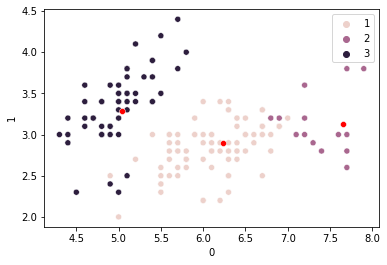

1
[0    6.118072
1    2.844578
2    4.744578
3    1.630120
dtype: float64, 0    7.385714
1    3.135714
2    6.228571
3    2.085714
dtype: float64, 0    5.005660
1    3.369811
2    1.560377
3    0.290566
dtype: float64]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        3
2    4.7  3.2  1.3  0.2        3
3    4.6  3.1  1.5  0.2        3
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        1
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        1
148  6.2  3.4  5.4  2.3        1
149  5.9  3.0  5.1  1.8        1

[150 rows x 5 columns]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        3
2    4.7  3.2  1.3  0.2        3
3    4.6  3.1  1.5  0.2        3
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        1
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        1
148  6.2  3.4  5.4  2.3        

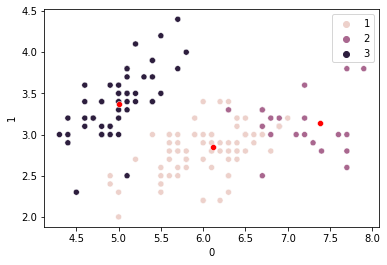

2
[0    6.031169
1    2.807792
2    4.609091
3    1.553247
dtype: float64, 0    7.122727
1    3.113636
2    6.031818
3    2.131818
dtype: float64, 0    5.007843
1    3.409804
2    1.492157
3    0.262745
dtype: float64]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        3
2    4.7  3.2  1.3  0.2        3
3    4.6  3.1  1.5  0.2        3
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        1
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        1
148  6.2  3.4  5.4  2.3        1
149  5.9  3.0  5.1  1.8        1

[150 rows x 5 columns]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        3
1    4.9  3.0  1.4  0.2        3
2    4.7  3.2  1.3  0.2        3
3    4.6  3.1  1.5  0.2        3
4    5.0  3.6  1.4  0.2        3
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        2
146  6.3  2.5  5.0  1.9        1
147  6.5  3.0  5.2  2.0        1
148  6.2  3.4  5.4  2.3        

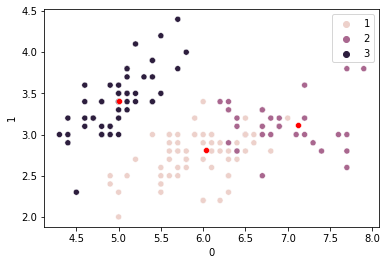

In [12]:
iris_x = load_iris()['data']

df = pd.DataFrame(data=iris_x)

#number of clusters
k = 3
#number of iterations
iterations = 3

# =============================================================================
# 1: Select centroids
# =============================================================================

def select_centroids(df, k):
    centroids = df.sample(n=k, replace=False)
    return centroids

# =============================================================================
# 2: kmeans
# =============================================================================

def get_closest_cluster(row):
    distances = []
    
    for centroid in centroids.values:
        distances.append(np.linalg.norm(centroid - row))
    return distances.index(min(distances)) + 1

centroids = select_centroids(df, k)

df['closest'] = df.apply(get_closest_cluster, axis=1)


# =============================================================================
# 3: looping
# =============================================================================

for it in range(iterations):
    print(it) 
    new_centroids = []
    for i in range(1,k+1):
        
        cluster_data = df[df['closest'] == i].iloc[:,:-1]
        new_centroids.append(np.mean(cluster_data, axis=0))
        #compute the mean of the cluster which is the new centroids
    
    print(new_centroids)
    centroids= pd.DataFrame(new_centroids)
    #set new centroids as centroids to use in iteration
    #print("centroids:" + centroids)
    print(df)
    df['closest'] = df.iloc[:,:-1].apply(get_closest_cluster, axis=1)
    #update closest cluster column with the new clostest cluster
    print(df)

    sb.scatterplot(data = df, x = 0, y = 1, hue='closest')
    sb.scatterplot(data = centroids, x = 0, y = 1, color= 'red')
    #update 0 and 1 in both lines above to see the plot (line 1) and the centroids (line 2) 
    #for the dimensions you want to compare
    
    plt.show()



## PSO


0
[0    5.242857
1    3.667857
2    1.500000
3    0.282143
dtype: float64, 0    4.704545
1    3.122727
2    1.413636
3    0.200000
dtype: float64, 0    6.262
1    2.872
2    4.906
3    1.676
dtype: float64]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        1
1    4.9  3.0  1.4  0.2        2
2    4.7  3.2  1.3  0.2        2
3    4.6  3.1  1.5  0.2        2
4    5.0  3.6  1.4  0.2        1
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        3
146  6.3  2.5  5.0  1.9        3
147  6.5  3.0  5.2  2.0        3
148  6.2  3.4  5.4  2.3        3
149  5.9  3.0  5.1  1.8        3

[150 rows x 5 columns]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        1
1    4.9  3.0  1.4  0.2        2
2    4.7  3.2  1.3  0.2        2
3    4.6  3.1  1.5  0.2        2
4    5.0  3.6  1.4  0.2        1
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        3
146  6.3  2.5  5.0  1.9        3
147  6.5  3.0  5.2  2.0        3
148  6.2  3.4  5.4  2.3        3
149  5.9  

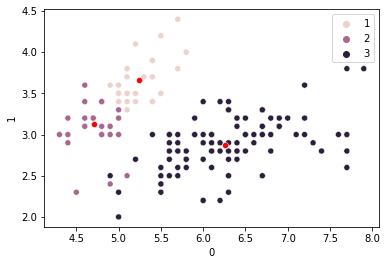

1
[0    5.242857
1    3.667857
2    1.500000
3    0.282143
dtype: float64, 0    4.729167
1    3.066667
2    1.558333
3    0.270833
dtype: float64, 0    6.287755
1    2.880612
2    4.941837
3    1.688776
dtype: float64]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        1
1    4.9  3.0  1.4  0.2        2
2    4.7  3.2  1.3  0.2        2
3    4.6  3.1  1.5  0.2        2
4    5.0  3.6  1.4  0.2        1
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        3
146  6.3  2.5  5.0  1.9        3
147  6.5  3.0  5.2  2.0        3
148  6.2  3.4  5.4  2.3        3
149  5.9  3.0  5.1  1.8        3

[150 rows x 5 columns]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        1
1    4.9  3.0  1.4  0.2        2
2    4.7  3.2  1.3  0.2        2
3    4.6  3.1  1.5  0.2        2
4    5.0  3.6  1.4  0.2        1
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        3
146  6.3  2.5  5.0  1.9        3
147  6.5  3.0  5.2  2.0        3
148  6.2  3.4  5.4  2.3        

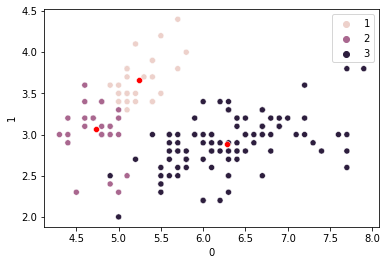

2
[0    5.242857
1    3.667857
2    1.500000
3    0.282143
dtype: float64, 0    4.740
1    3.036
2    1.628
3    0.300
dtype: float64, 0    6.301031
1    2.886598
2    4.958763
3    1.695876
dtype: float64]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        1
1    4.9  3.0  1.4  0.2        2
2    4.7  3.2  1.3  0.2        2
3    4.6  3.1  1.5  0.2        2
4    5.0  3.6  1.4  0.2        1
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        3
146  6.3  2.5  5.0  1.9        3
147  6.5  3.0  5.2  2.0        3
148  6.2  3.4  5.4  2.3        3
149  5.9  3.0  5.1  1.8        3

[150 rows x 5 columns]
       0    1    2    3  closest
0    5.1  3.5  1.4  0.2        1
1    4.9  3.0  1.4  0.2        2
2    4.7  3.2  1.3  0.2        2
3    4.6  3.1  1.5  0.2        2
4    5.0  3.6  1.4  0.2        1
..   ...  ...  ...  ...      ...
145  6.7  3.0  5.2  2.3        3
146  6.3  2.5  5.0  1.9        3
147  6.5  3.0  5.2  2.0        3
148  6.2  3.4  5.4  2.3        3
149  5.9  

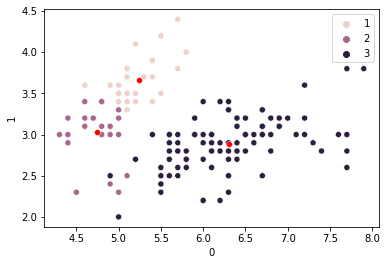

In [13]:
iris_x = load_iris()['data']

df = pd.DataFrame(data=iris_x)

#number of clusters
k = 3
#number of iterations
iterations = 3

# =============================================================================
# 1: Select centroids
# =============================================================================

def select_centroids(df, k):
    centroids = df.sample(n=k, replace=False)
    return centroids

# =============================================================================
# 2: kmeans
# =============================================================================

def get_closest_cluster(row):
    distances = []
    
    for centroid in centroids.values:
        distances.append(np.linalg.norm(centroid - row))
    return distances.index(min(distances)) + 1

centroids = select_centroids(df, k)

df['closest'] = df.apply(get_closest_cluster, axis=1)


# =============================================================================
# 3: looping
# =============================================================================

for it in range(iterations):
    print(it) 
    new_centroids = []
    for i in range(1,k+1):
        
        cluster_data = df[df['closest'] == i].iloc[:,:-1]
        new_centroids.append(np.mean(cluster_data, axis=0))
        #compute the mean of the cluster which is the new centroids
    
    print(new_centroids)
    centroids= pd.DataFrame(new_centroids)
    #set new centroids as centroids to use in iteration
    #print("centroids:" + centroids)
    print(df)
    df['closest'] = df.iloc[:,:-1].apply(get_closest_cluster, axis=1)
    #update closest cluster column with the new clostest cluster
    print(df)

    sb.scatterplot(data = df, x = 0, y = 1, hue='closest')
    sb.scatterplot(data = centroids, x = 0, y = 1, color= 'red')
    #update 0 and 1 in both lines above to see the plot (line 1) and the centroids (line 2) 
    #for the dimensions you want to compare
    
    plt.show()



## Artificial 1 dataset

In [36]:
# Creating the "Artificial 1" dataset as described in the paper Data Clustering using Particle Swarm Optimization
artf_x = np.random.rand(400, 2)
artf_y = []

for values in artf_x:
    if values[0] >= 0.7:
        artf_y.append(1)
    elif values[0] <= 0.3 and values[1]>= -values[1]-0.2:
        artf_y.append(1)
    else:
        artf_y.append(0)

0
[0    0.782077
1    0.354446
dtype: float64, 0    0.349338
1    0.572052
dtype: float64]
            0         1  closest
0    0.732220  0.678575        1
1    0.094507  0.191809        2
2    0.720201  0.986013        2
3    0.822261  0.065934        1
4    0.784953  0.779323        1
..        ...       ...      ...
395  0.759448  0.582733        1
396  0.932186  0.402909        1
397  0.850370  0.812441        1
398  0.097445  0.974497        2
399  0.884307  0.041494        1

[400 rows x 3 columns]
            0         1  closest
0    0.732220  0.678575        1
1    0.094507  0.191809        2
2    0.720201  0.986013        2
3    0.822261  0.065934        1
4    0.784953  0.779323        1
..        ...       ...      ...
395  0.759448  0.582733        1
396  0.932186  0.402909        1
397  0.850370  0.812441        1
398  0.097445  0.974497        2
399  0.884307  0.041494        1

[400 rows x 3 columns]


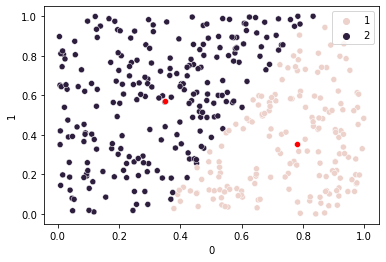

1
[0    0.753775
1    0.353671
dtype: float64, 0    0.334567
1    0.590686
dtype: float64]
            0         1  closest
0    0.732220  0.678575        1
1    0.094507  0.191809        2
2    0.720201  0.986013        2
3    0.822261  0.065934        1
4    0.784953  0.779323        1
..        ...       ...      ...
395  0.759448  0.582733        1
396  0.932186  0.402909        1
397  0.850370  0.812441        1
398  0.097445  0.974497        2
399  0.884307  0.041494        1

[400 rows x 3 columns]
            0         1  closest
0    0.732220  0.678575        1
1    0.094507  0.191809        2
2    0.720201  0.986013        2
3    0.822261  0.065934        1
4    0.784953  0.779323        1
..        ...       ...      ...
395  0.759448  0.582733        1
396  0.932186  0.402909        1
397  0.850370  0.812441        1
398  0.097445  0.974497        2
399  0.884307  0.041494        1

[400 rows x 3 columns]


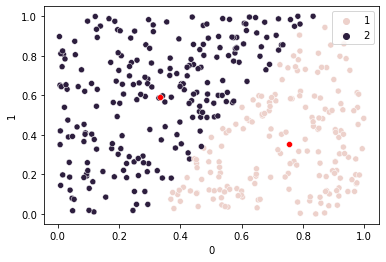

2
[0    0.737742
1    0.349962
dtype: float64, 0    0.328676
1    0.604573
dtype: float64]
            0         1  closest
0    0.732220  0.678575        1
1    0.094507  0.191809        2
2    0.720201  0.986013        2
3    0.822261  0.065934        1
4    0.784953  0.779323        1
..        ...       ...      ...
395  0.759448  0.582733        1
396  0.932186  0.402909        1
397  0.850370  0.812441        1
398  0.097445  0.974497        2
399  0.884307  0.041494        1

[400 rows x 3 columns]
            0         1  closest
0    0.732220  0.678575        1
1    0.094507  0.191809        2
2    0.720201  0.986013        2
3    0.822261  0.065934        1
4    0.784953  0.779323        1
..        ...       ...      ...
395  0.759448  0.582733        1
396  0.932186  0.402909        1
397  0.850370  0.812441        1
398  0.097445  0.974497        2
399  0.884307  0.041494        1

[400 rows x 3 columns]


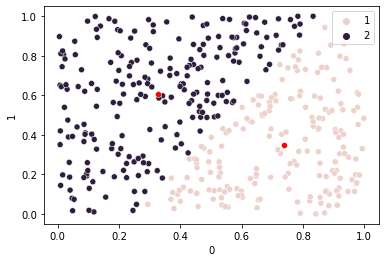

In [38]:
#Load the artificial 1 dataset

df = pd.DataFrame(data=artf_x)

#number of clusters
k = 2
#number of iterations
iterations = 3

# =============================================================================
# 1: Select centroids
# =============================================================================

def select_centroids(df, k):
    centroids = df.sample(n=k, replace=False)
    return centroids

# =============================================================================
# 2: kmeans
# =============================================================================

def get_closest_cluster(row):
    distances = []
    
    for centroid in centroids.values:
        distances.append(np.linalg.norm(centroid - row))
    return distances.index(min(distances)) + 1

centroids = select_centroids(df, k)

df['closest'] = df.apply(get_closest_cluster, axis=1)


# =============================================================================
# 3: looping
# =============================================================================

for it in range(iterations):
    print(it) 
    new_centroids = []
    for i in range(1,k+1):
        
        cluster_data = df[df['closest'] == i].iloc[:,:-1]
        new_centroids.append(np.mean(cluster_data, axis=0))
        #compute the mean of the cluster which is the new centroids
    
    print(new_centroids)
    centroids= pd.DataFrame(new_centroids)
    #set new centroids as centroids to use in iteration
    #print("centroids:" + centroids)
    print(df)
    df['closest'] = df.iloc[:,:-1].apply(get_closest_cluster, axis=1)
    #update closest cluster column with the new clostest cluster
    print(df)

    sb.scatterplot(data = df, x = 0, y = 1, hue='closest')
    sb.scatterplot(data = centroids, x = 0, y = 1, color= 'red')
    #update 0 and 1 in both lines above to see the plot (line 1) and the centroids (line 2) 
    #for the dimensions you want to compare
    
    plt.show()



# Excercise 4
#### Figure 1 shows a (toy) problem instance for the 2-cardinality tree problem. The 2-cardinality tree problem amounts to finding a subtree T of a given undirected graph G with exactly 2 edges and the minimum possible weight.

## 4.a 
#### Is ACO for this problem a Competition-Balanced System (CBS)? Justify your answer.


ACO for this problem is not a competition balanced system. This is because not all c in C where C is the set of solution components occur in the same number of feasible solutions.

A feasible solution is described by Blum, Christian, and Marco Dorigo as "A feasible solution is a complete assignment (i.e., an assignment in which each decision variable has a domain value assigned) that satisfies the constraints". 

A solution for this problem consists of 2 variables: edge A and edge B which both have a domain value assigned to them (the edge weight. 

In figure 1, we have three solutions: 1-2-3 with a weight of 3, 2-3-4 with a weight of 4 and 3-4-5 with a weight of 3. All of these solutions are feasible solutions, because they all have a value that falls within the domain which is the domain fo the natural numbers for this problem. 

For any feasible partial solution we take, we can form one of these three solutions, since a partial solution consists of one edge, and we are allowed to add one more edge to complete the solution. 

In the slides, a Competition-balanced system is described as: "An ACO and a problem instance are Competition Balanced System (CBS) if given a feasible partial solution Sp and the set C of solution components that can be added to extend Sp, all c in C occur in the same number of feasible solutions"

As we can see, 3 occurs in 3 solutions, 2 and 4 occur in 2 solutions and 1 and 5 occur in one solution. Thus not all c occur in the same number of feasible solutions, and thus the problem is not competition balanced. 